In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from model.pca import PCA
from utils.image_utils import ImageUtils

CURRENT_WORKING_DIR = os.path.abspath(os.getcwd())
OLIVETTI_FACES = "data\olivetti\olivetti_faces.npy"
def load_dataset_olivetti():
    faces = np.load(os.path.join(CURRENT_WORKING_DIR, OLIVETTI_FACES))
    print(f"dataset shape {faces.shape}")
    return faces

dataset = load_dataset_olivetti()
# flattening the image
X = dataset.reshape((dataset.shape[0], dataset.shape[1]**2))

dataset shape (400, 64, 64)


In [3]:
n_components = [60, 100]
pca_insts = []
for k in n_components:
    pca = PCA(k)
    pca.fit(X)
    pca_insts.append(pca)
    # explained_variance
    print(f"num components = {k}: Get an explained variance of {pca.explained_variance}")

num components = 60: Get an explained variance of 0.8913601040840149
num components = 100: Get an explained variance of 0.9353532195091248


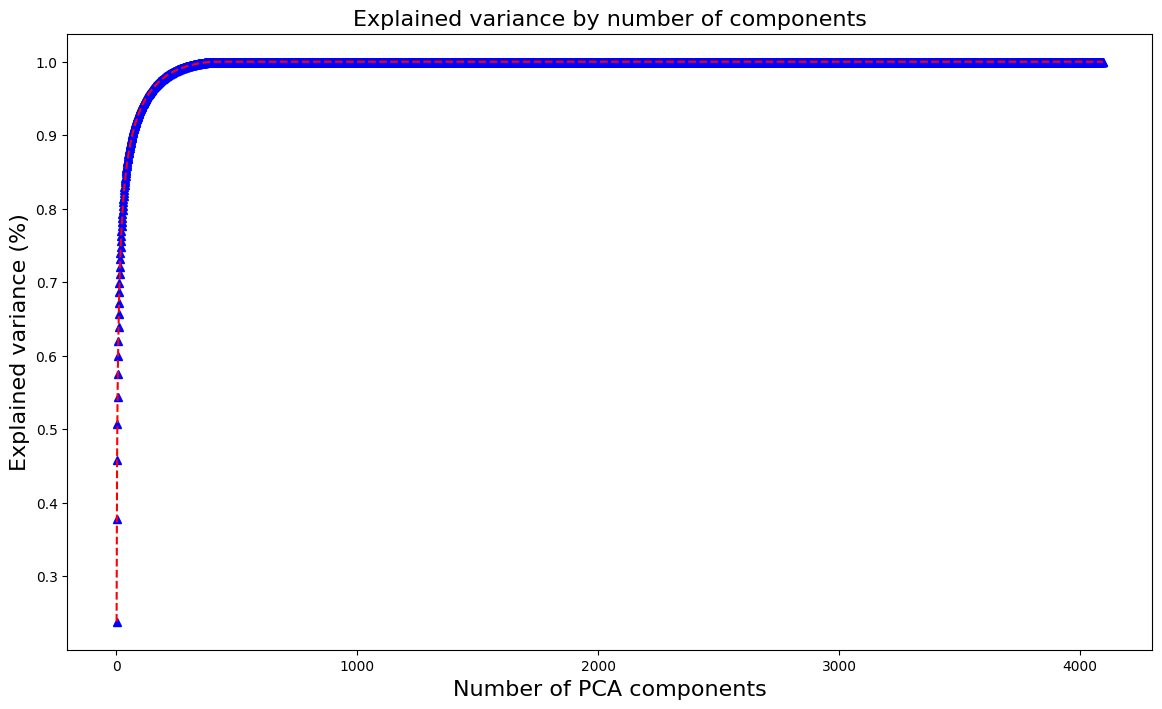

In [4]:
ImageUtils.plot_explained_variance(pca_insts[0])

In [5]:
# k=100
pca = pca_insts[1]
# X after dim reduction
X_compressed = np.dot(X, pca.components)
print(f"X_compressed.shape {X_compressed.shape}")
# reconstruct
reconstructed_X = pca.inverse_transform(X_compressed)
print(f"reconstructed_X.shape {reconstructed_X.shape}")

X_compressed.shape (400, 100)
reconstructed_X.shape (400, 4096)


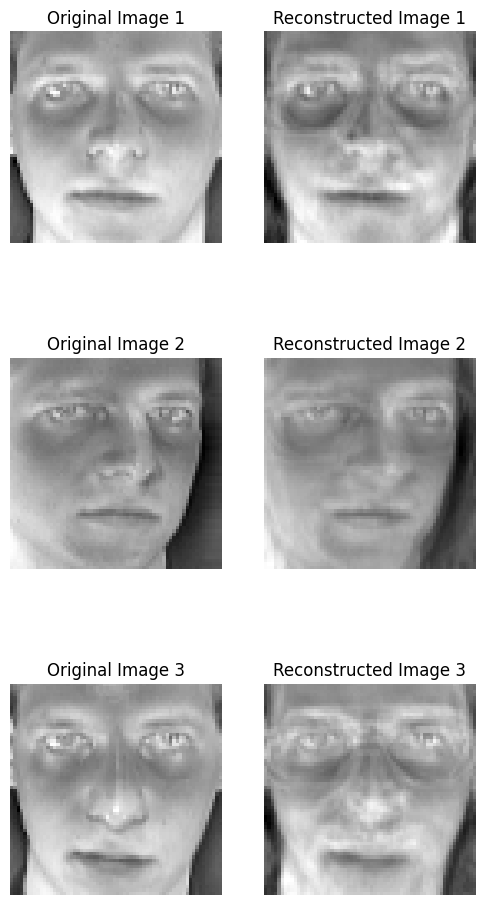

In [6]:
ImageUtils.show_images_comparision(X, reconstructed_X, num_images=3)

In [14]:
# Let’s see what the average of all images looks like
# avgFace = np.average(X, axis=0)
# show_image(avgFace)